We will using a credit card fraud data set to detect fraud action. The original data set comes from Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud. It contains roughly 280K observations originally. I have simplified down to roughly 3000 observations. The aim of this project is to compare a few ML models and compare.

In [1]:
# General imports
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
# Load the data set
fraud = pd.read_csv('fraud.csv')
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,149938,-0.445664,0.565437,0.733374,-0.999763,1.609578,1.187041,1.452018,-0.198439,-0.048416,...,-0.195318,-0.107752,-0.100277,-0.329253,-0.375723,0.275200,-0.349132,-0.338845,50.19,0
1,148077,0.111788,1.124121,-0.191350,-0.443245,0.777409,-1.071823,1.068130,-0.203815,-0.246504,...,-0.297632,-0.660398,0.144101,1.072859,-0.444134,0.079985,0.229395,0.091531,5.37,0
2,121831,2.087566,-1.134330,-0.593377,-1.058366,-1.104703,-0.413032,-1.112383,0.110687,-0.074055,...,0.053867,-0.082683,0.328018,-0.543838,-0.593097,-0.466010,-0.010324,-0.052221,40.00,0
3,75683,-0.488630,1.039124,1.413263,0.110440,0.205570,-0.721798,0.677329,-0.007125,-0.568263,...,-0.189721,-0.439538,0.084214,0.374691,-0.235030,0.077754,0.262267,0.102935,12.99,0
4,46080,-1.018049,0.727356,1.723606,-1.409580,0.255078,-0.648925,0.807408,0.190881,-0.605563,...,-0.425400,-1.383973,0.085528,0.175845,-0.104718,0.462432,0.159748,0.099125,19.99,0


The data contains 31 columns. The first 30 columns are predictors and the last column (Class) is the response. There are no variable names to these columns, since they are PCA transformed. We will get rid of the Time column, and look at the distribution of the Class variable.

In [3]:
# Remove the Time column
del fraud['Time']
# Look at distribution of Class variable
fraud['Class'].value_counts()

0    2500
1     492
Name: Class, dtype: int64

The two classes are quite unbalanced, which means we need to be careful with the evaluation metrics to use. 

For this project, we will fit the following 5 classification models:
- Logistic Regression
- Decision Tree
- Bagged Trees
- Random Forest
- Boosted Trees

The goal is to compare these models, and see which gives the best performance. To be fair, we will perform the evaluation using a same holdout set.

In [4]:
# Separate predictors and response
X = fraud.drop('Class', axis = 1)
y = fraud.Class

# Split your data into training and holdout set. 
# Use random state 1 and test size of 30%.
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size = 0.3, random_state = 1)


Now, let's train each of the 5 models using the training set. 

Since the response class is quite imbalanced, accuracy will be a bad metric to use here.We will use the F1-score when selecting the best hyperparameter for all models (https://en.wikipedia.org/wiki/F1_score). 

In [5]:
CV=5 #cv
score='f1' #scoring
rs=1 #random_state
MSL=5 #Minimum sample leaves- minimum number of observations at each terminal node

In [6]:
# Train and tune Logistic Regression
logistic_regression=Pipeline([('scale',StandardScaler()),('clf',LogisticRegression(solver = 'newton-cg', penalty = 'none',max_iter=10000,random_state = rs))])
paras_1={'clf__C':np.logspace(-10, 10, 21)}
LR = GridSearchCV(estimator = logistic_regression, param_grid = paras_1, cv = CV, scoring = score, n_jobs = -1) 
LR.fit(X_train, y_train)

C:\Users\dira9\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=10000,
                                                           multi_class='auto',
            

In [7]:
# Train and tune  Decision Tree
decision_tree =  DecisionTreeClassifier(random_state=rs,min_samples_leaf = MSL)
paras_2 = {'max_leaf_nodes': range(2,50),'max_depth': range(1,50)}
DT = GridSearchCV(estimator = decision_tree,param_grid =  paras_2, n_jobs = -1, cv = CV,scoring=score)
DT.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 50),
                         'max_leaf_nodes': range(2, 50)},
             pre_di

In [8]:
# Train and tune Bagged Tree  
Bagged_tree=RandomForestClassifier( max_features=None,random_state = rs,min_samples_leaf = MSL)
paras_3= {'n_estimators': np.linspace(100,1000,10, dtype = int)}
BaT = GridSearchCV(estimator = Bagged_tree,param_grid = paras_3,cv =CV, n_jobs = -1, scoring = score) 
BaT.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                     

In [9]:
# Train and tune Random Forest
Random_forest=RandomForestClassifier(max_features = 'sqrt', random_state = rs, min_samples_leaf = MSL)
paras_4 = {'n_estimators': np.linspace(100, 1000, 10, dtype = int)}
RF = GridSearchCV(estimator = Random_forest, param_grid =paras_4, cv = CV, n_jobs = -1, scoring = score)
RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [10]:
# Train and tune  Boosted Trees
Gradient_boosting=GradientBoostingClassifier(min_samples_leaf = MSL, random_state = rs, learning_rate = 0.01)
paras_5= {'n_estimators': np.linspace(100, 1000, 10, dtype = int)}
BoT = GridSearchCV(estimator=Gradient_boosting,param_grid = paras_5, cv = CV, n_jobs = -1, scoring = score)
BoT.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.01,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=5,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

Now that you have trained all 5 models (hopefully you have named your classifiers __clearly__). It's time to evaluate the 5 models altogether. First, perform prediction on all 5 models using the holdout set, and report the F1 score.

In [11]:
# Perform evaluation on holdout set
LR_f1=f1_score(y_holdout,LR.predict(X_holdout))
DT_f1=f1_score(y_holdout,DT.predict(X_holdout))
BaT_f1=f1_score(y_holdout,BaT.predict(X_holdout))
RF_f1=f1_score(y_holdout,RF.predict(X_holdout))
BoT_f1=f1_score(y_holdout,BoT.predict(X_holdout))
data_F1=[['Logistic Regression',LR_f1],['Decision Tree',DT_f1],['Bagged Trees',BaT_f1],['Random Forest',RF_f1],['Boosted Trees',BoT_f1]]
F1_scores=pd.DataFrame(data_F1,columns=["Classification model","F1 Scores"])
F1_scores.sort_values(by='F1 Scores',ascending= False)

,Classification model,F1 Scores
0,Logistic Regression,0.893773
3,Random Forest,0.891386
4,Boosted Trees,0.889706
2,Bagged Trees,0.885609
1,Decision Tree,0.878229


Logistic regression has the best performance, followed by random forest then boosted trees then bagged trees. As expected, a single decision tree doesn't perform too well.

# ROC curve

In [12]:
# ROC Curves
LR_yprob=LR.predict_proba(X_holdout)[:,1]
LR_roc=roc_curve(y_holdout,LR_yprob)
DT_yprob=DT.predict_proba(X_holdout)[:,1]
DT_roc=roc_curve(y_holdout,DT_yprob)
BaT_yprob=BaT.predict_proba(X_holdout)[:,1]
BaT_roc=roc_curve(y_holdout,BaT_yprob)
RF_yprob=RF.predict_proba(X_holdout)[:,1]
RF_roc=roc_curve(y_holdout,RF_yprob)
BoT_yprob=BoT.predict_proba(X_holdout)[:,1]
BoT_roc=roc_curve(y_holdout,BoT_yprob)

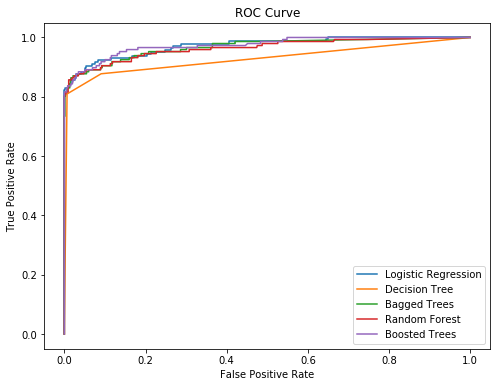

In [13]:
plt.figure(figsize=(8,6))
plt.plot(LR_roc[0],LR_roc[1],label="Logistic Regression")
plt.plot(DT_roc[0],DT_roc[1],label="Decision Tree")
plt.plot(BaT_roc[0],BaT_roc[1],label="Bagged Trees")
plt.plot(RF_roc[0],RF_roc[1],label="Random Forest")
plt.plot(BoT_roc[0],BoT_roc[1],label="Boosted Trees")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

 Boosted trees performed the best and decision tree performed the worst

Calculating the AUC score of these 5 classifiers.

In [14]:
# AUC values
LR_auc=roc_auc_score(y_holdout, LR_yprob)
DT_auc=roc_auc_score(y_holdout, DT_yprob)
BaT_auc=roc_auc_score(y_holdout, BaT_yprob)
RF_auc=roc_auc_score(y_holdout, RF_yprob)
BoT_auc=roc_auc_score(y_holdout,BoT_yprob)

In [15]:
data_AUC=[['Logistic Regression',LR_auc],['Decision Tree',DT_auc],['Bagged Trees',BaT_auc],['Random Forest',RF_auc],['Boosted Trees',BoT_auc]]
AUC_scores=pd.DataFrame(data_AUC,columns=["Classification model","AUC Scores"])
AUC_scores.sort_values(by='AUC Scores',ascending= False)

,Classification model,AUC Scores
4,Boosted Trees,0.973840
0,Logistic Regression,0.972617
2,Bagged Trees,0.967590
3,Random Forest,0.964048
1,Decision Tree,0.927321


Boosted tree has the highest AUC score, followed by Logistic and decision tree is the worst.

Lastly, with the best classifier (based on the observations from above), present the confusion matrix on the holdout set.

Logistic and boosted seems be performing well. We will consider logistic regression to be best classifier and present the confusion matrix on the holdout set.

In [16]:
# Confusion matrix
LR_yhat=np.where(LR_yprob > 0.5,1,0)
LR_confmat=pd.DataFrame(confusion_matrix(y_holdout,LR_yhat))
print("Confusion matrix on the test set ")
LR_confmat

Confusion matrix on the test set 


,0,1
0,747,4
1,25,122
